In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Load_data/DataSet_DummiesWT.csv')
df

,character,max_hp,entering_hp,damage_taken,enemies,Adaptation,Adaptation+1,Alpha,Alpha+1,Apotheosis,...,Unceasing Top,Vajra,Velvet Choker,VioletLotus,WarpedTongs,Whetstone,White Beast Statue,WingedGreaves,Yang,level_asc_floor
0,WATCHER,72,72,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,WATCHER,72,72,0,57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,WATCHER,72,72,15,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,WATCHER,72,57,17,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
4,WATCHER,72,61,0,18,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,WATCHER,72,72,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
15908,WATCHER,72,72,44,42,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
15909,WATCHER,72,49,25,41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
15910,WATCHER,72,24,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21


In [4]:
import tensorflow as tf
import keras

In [10]:
X = df.drop(columns=['character', 'damage_taken'])
y = df['damage_taken']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='linear'))

c:\Users\zubi_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        49,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,417 (236.00 KB)

 Trainable params: 60,417 (236.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 533.1351
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 168.8716
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 155.1264
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 154.8688
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 149.7049
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 143.1935
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 148.3849
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 146.3388
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 144.0464
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 142.5866
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 138.7711
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 134.9513
Epoch 13/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 133.7461
Epoch 14/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 133.2988
Epoch 15/100
39

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
120.74010038256922
0.20193742438094497


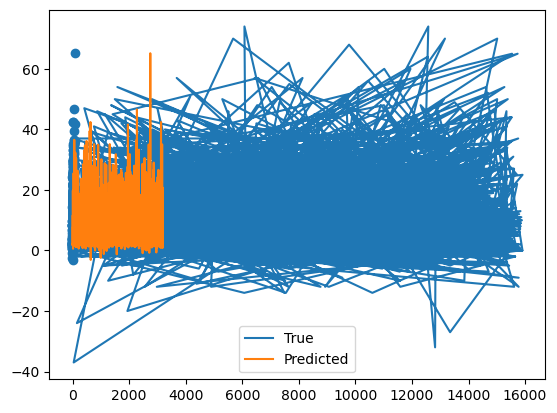

In [9]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)


plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()